##**Péndulo Doble**

Las ecuaciones diferenciales no lineales simples pueden tener soluciones complicadas y caóticas. En este problema se observa el movimiento caótico del **péndulo doble**. Aunque el movimiento es caótico, las gráficas revelan un orden subyacente en el caos.

El péndulo doble se muestra en la figura a continuación. Consiste en dos péndulos simples, donde la masa del primer péndulo es el punto de pivote del segundo.  Sean $m_i$ y $L_i$ la masa y la longitud del i-ésimo péndulo simple, respectivamente. $θ_1$ es el ángulo entre la dirección vertical y el primer péndulo, y $θ_2$ es el ángulo entre la dirección vertical y el segundo, como se muestra en la figura. Tener en cuenta que solo hay dos grados de libertad, $θ_1$ y $θ_2$. Sin embargo, esto es suficiente para obtener un movimiento caótico.

<p align="center">
<img src="https://www.numfys.net/media/notebooks/images/double_pendulum.png" alt="Shooting" title="The shooting of a target." width="30%"/>
<p>

### Ecuaciones de movimiento

Considere la configuración de la figura. La posición de la masa $ m_1 $ es

\begin{equation}
\begin{aligned}
x_1 &= L_1\sin\theta_1\\
y_1 &= -L_1\cos\theta_1.
\end{aligned}
\end{equation}

La posición de la masa $m_2$ puede ser expresada como:

\begin{equation}
\begin{aligned}
x_2 &= x_1 + L_2\sin\theta_2\\
y_2 &= y_1 -L_2\cos\theta_2.
\end{aligned}
\end{equation}

Usando ese $v_1^2 = \dot x_1^ 2 + \dot y_1^2$ y $ v_2 ^ 2 = \dot x_2 ^ 2 + \dot x_2 ^ 2 $ y las ecuaciones de posiciones, se puede mostrar que las energías cinéticas de las masas se vuelven 

\begin{equation}
\begin{aligned}
T_1 &= \frac{1}{2}m_1v_1^2 = \frac{1}{2}m_1L_1^2\dot\theta_1^2,\\
T_2 &= \frac{1}{2}m_2v_2^2 = \frac{1}{2}m_2\left(L_1^2\dot\theta_1^2 + L_2^2\dot\theta_2^2+2L_1L_2\cos(\theta_1-\theta_2)\dot\theta_1\dot\theta_2\right).
\end{aligned}
\end{equation}

Las energías potenciales son:

\begin{equation}
\begin{aligned}
V_1 &= m_1gy_1 = -m_1gL_1\cos\theta_1,\\
V_2 &= m_2gy_2 = -m_2g\left(L_1\cos\theta_1+L_2\cos\theta_2\right).
\end{aligned}
\end{equation}

Ahora formamos el $ L = T-V = T_1 + T_2-V_1-V_2 $ de Lagrange a partir de la ecuación de las energías cinéticas y potenciales, y lo insertamos en las ecuaciones de Euler-Lagrange dadas por:


\begin{equation}
\frac{\partial L}{\partial \theta_1} = \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot\theta_1}
\end{equation}

y

\begin{equation}
\frac{\partial L}{\partial \theta_2} = \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot\theta_2}.
\end{equation}

La ecuación $\frac{\partial L}{\partial \theta_1}$ produce:

\begin{equation}
-m_1gL_1\sin\theta_1-m_2L_1g\sin\theta_1 = (m_1+m_2)L_1^2\ddot\theta_1 + m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta^2 + m_2L_1L_2\cos(\theta_1 - \theta_2)\ddot\theta_2,
\end{equation}

mientras que la ecuación $\frac{\partial L}{\partial \theta_1}$ muestra

\begin{equation}
-m_2gL_2\sin\theta_2 = m_2L_2^2\ddot\theta_2 + m_2L_1L_2\cos(\theta_1-\theta_2)\ddot\theta_1-m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta_1^2.
\end{equation}

Si resolvemos $ \ddot \theta_1 $ y $ \ddot \theta_2 $ obtenemos después de algunas manipulaciones

\begin{equation}
\begin{aligned}
\ddot\theta_1 &= \frac{1}{L_1\xi}\left[L_1m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_1^2 + L_2m_2\sin(\theta_1-\theta_2)\dot\theta_2^2 - m_2g\cos(\theta_1-\theta_2)\sin(\theta_2) + (m_1+m_2)g\sin(\theta_1) \right],\\
\ddot\theta_2 &= \frac{1}{L_2\xi}\left[L_2m_2\cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)\dot\theta_2^2 + L_1(m_1+m_2)\sin(\theta_1-\theta_2)\dot\theta_1^2+(m_1+m_2)g\sin(\theta_1)\cos(\theta_1-\theta_2) - (m_1+m_2)g\sin(\theta_2) \right],\\
\end{aligned}
\end{equation}

con

\begin{equation}
\xi \equiv \cos^2(\theta_1-\theta_2)m_2-m_1-m_2.
\end{equation}

Las ecuaciones de $\ddot \theta_1$ y $\ddot \theta_2$ son las ecuaciones de movimiento para el péndulo doble. Es conveniente introducir $ \omega_i \equiv \dot \theta_i $ y volver a expresar las ecuaciones de movimiento como cuatro ecuaciones diferenciales de primer orden.

In [84]:
# Librerias

from scipy.integrate import odeint
from numpy import cos, sin, arange, pi
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

figsize = 10
dpi = 600
g = 9.81     # m/s^2 Aceleración de la gravedad

### Movimiento del péndulo doble

Las ecuaciones de movimiento serían:

\begin{align}
\dot\omega_1 &= \frac{1}{L_1\xi}\left[L_1m_2c_{12}s_{12}\omega_1^2 + L_2m_2s_{12}\omega_2^2 - m_2gc_{12}s_2 + (m_1+m_2)gs_1 \right],\\
\dot\omega_2 &= \frac{1}{L_2\xi}\left[L_2m_2c_{12}s_{12}\omega_2^2 + L_1(m_1+m_2)s_{12}\omega_1^2+(m_1+m_2)gs_1c_{12} - (m_1+m_2)gs_2 \right],\\
\omega_1 &= \dot\theta_1,\\
\omega_2 &= \dot\theta_2,
\end{align}

donde se define $ c_{12} \equiv \cos (\theta_1- \theta_2)$, $ s_ {12} \equiv \sin (\theta_1- \theta_2) $, $ s_i \equiv \sin (\theta_i) $ y $ \xi \equiv c_{12}^2m_2-m_1-m_2 $  

In [85]:
def RHS(z, t, L1, L2, m1, m2, g):
    theta1, w1, theta2, w2 = z
    cos12 = cos(theta1 - theta2)
    sin12 = sin(theta1 - theta2)
    sin1 = sin(theta1)
    sin2 = sin(theta2)
    xi = cos12**2*m2 - m1 - m2
    w1dot = ( L1*m2*cos12*sin12*w1**2 + L2*m2*sin12*w2**2
            - m2*g*cos12*sin2      + (m1 + m2)*g*sin1)/(L1*xi)
    w2dot = -( L2*m2*cos12*sin12*w2**2 + L1*(m1 + m2)*sin12*w1**2
            + (m1 + m2)*g*sin1*cos12  - (m1 + m2)*g*sin2 )/(L2*xi)
    return w1, w1dot, w2, w2dot

def to_cartesian(theta1, w1, theta2, w2, L1, L2):
    x1 = L1 * sin(theta1)
    y1 = -L1 * cos(theta1)
    x2 = x1 + L2 * sin(theta2)
    y2 = y1 - L2 * cos(theta2)
    vx1 = L1*cos(theta1)*w1
    vy1 = L1*sin(theta1)*w1
    vx2 = vx1 + L2*cos(theta2)*w2
    vy2 = vy1 + L2*sin(theta2)*w2
    return x1, y1, x2, y2, vx1, vy1, vx2, vy2

Ahora necesitamos definir los parámetros en la configuración.

Aquí, se hace la elección (arbitraria) $ 2L_1 = L_2 $ y $ m_1 = 3m_2 $, y se deja ocilar el pendulo durante 50 segundos.

In [86]:
L1, L2 = 1., 2.
m1, m2 = 3., 1.

z0 = [pi/2, 0, pi/2, 0]
tmax, dt = 50, 0.01
t = arange(0, tmax+dt, dt)

In [87]:
# Perform simulation
z = odeint(RHS, z0, t, args=(L1, L2, m1, m2, g))

# Extract result
theta1, w1, theta2, w2 = z[:,0], z[:,1], z[:,2], z[:,3]
x1, y1, x2, y2, vx1, vy1, vx2, vy2 = to_cartesian(theta1, w1, theta2, w2, L1, L2)

In [88]:
def plot_position(x1, y1, x2, y2, theta1, theta2, t):
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)

    # xy-plot
    L = 1.1*(L1 + L2)
    ax = plt.subplot(2, 2, (1, 3), autoscale_on=False, xlim=(-L, L), ylim=(-L, L))
    ax.plot(x1, y1, label=r"Track $m_1$")
    ax.plot(x2, y2, label=r"Track $m_2$")
    ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], "-o", label="Initial position", c='k')
    plt.ylabel(r"$y/L$")
    plt.xlabel(r"$x/L$")
    ax.legend()

    # xt-plot
    ax = plt.subplot(2, 2, 2)
    ax.plot(t, theta1, label=r"$\theta_1(t)$")
    ax.plot(t, theta2, label=r"$\theta_2(t)$")
    plt.ylabel(r"$\theta$, [rad]")
    plt.xlabel(r"$t$, [s]")
    ax.legend()
    plt.xlim([0, np.max(t)])

    # yt-plot
    ax = plt.subplot(2, 2, 4)
    ax.plot(t, w1, label=r"$\omega_1(t)$")
    ax.plot(t, w2, label=r"$\omega_2(t)$")
    plt.ylabel(r"$\omega$, [rad/s]")
    plt.xlabel(r"$t$, [s]")
    plt.xlim([0, np.max(t)])
    ax.legend()

    plt.show()

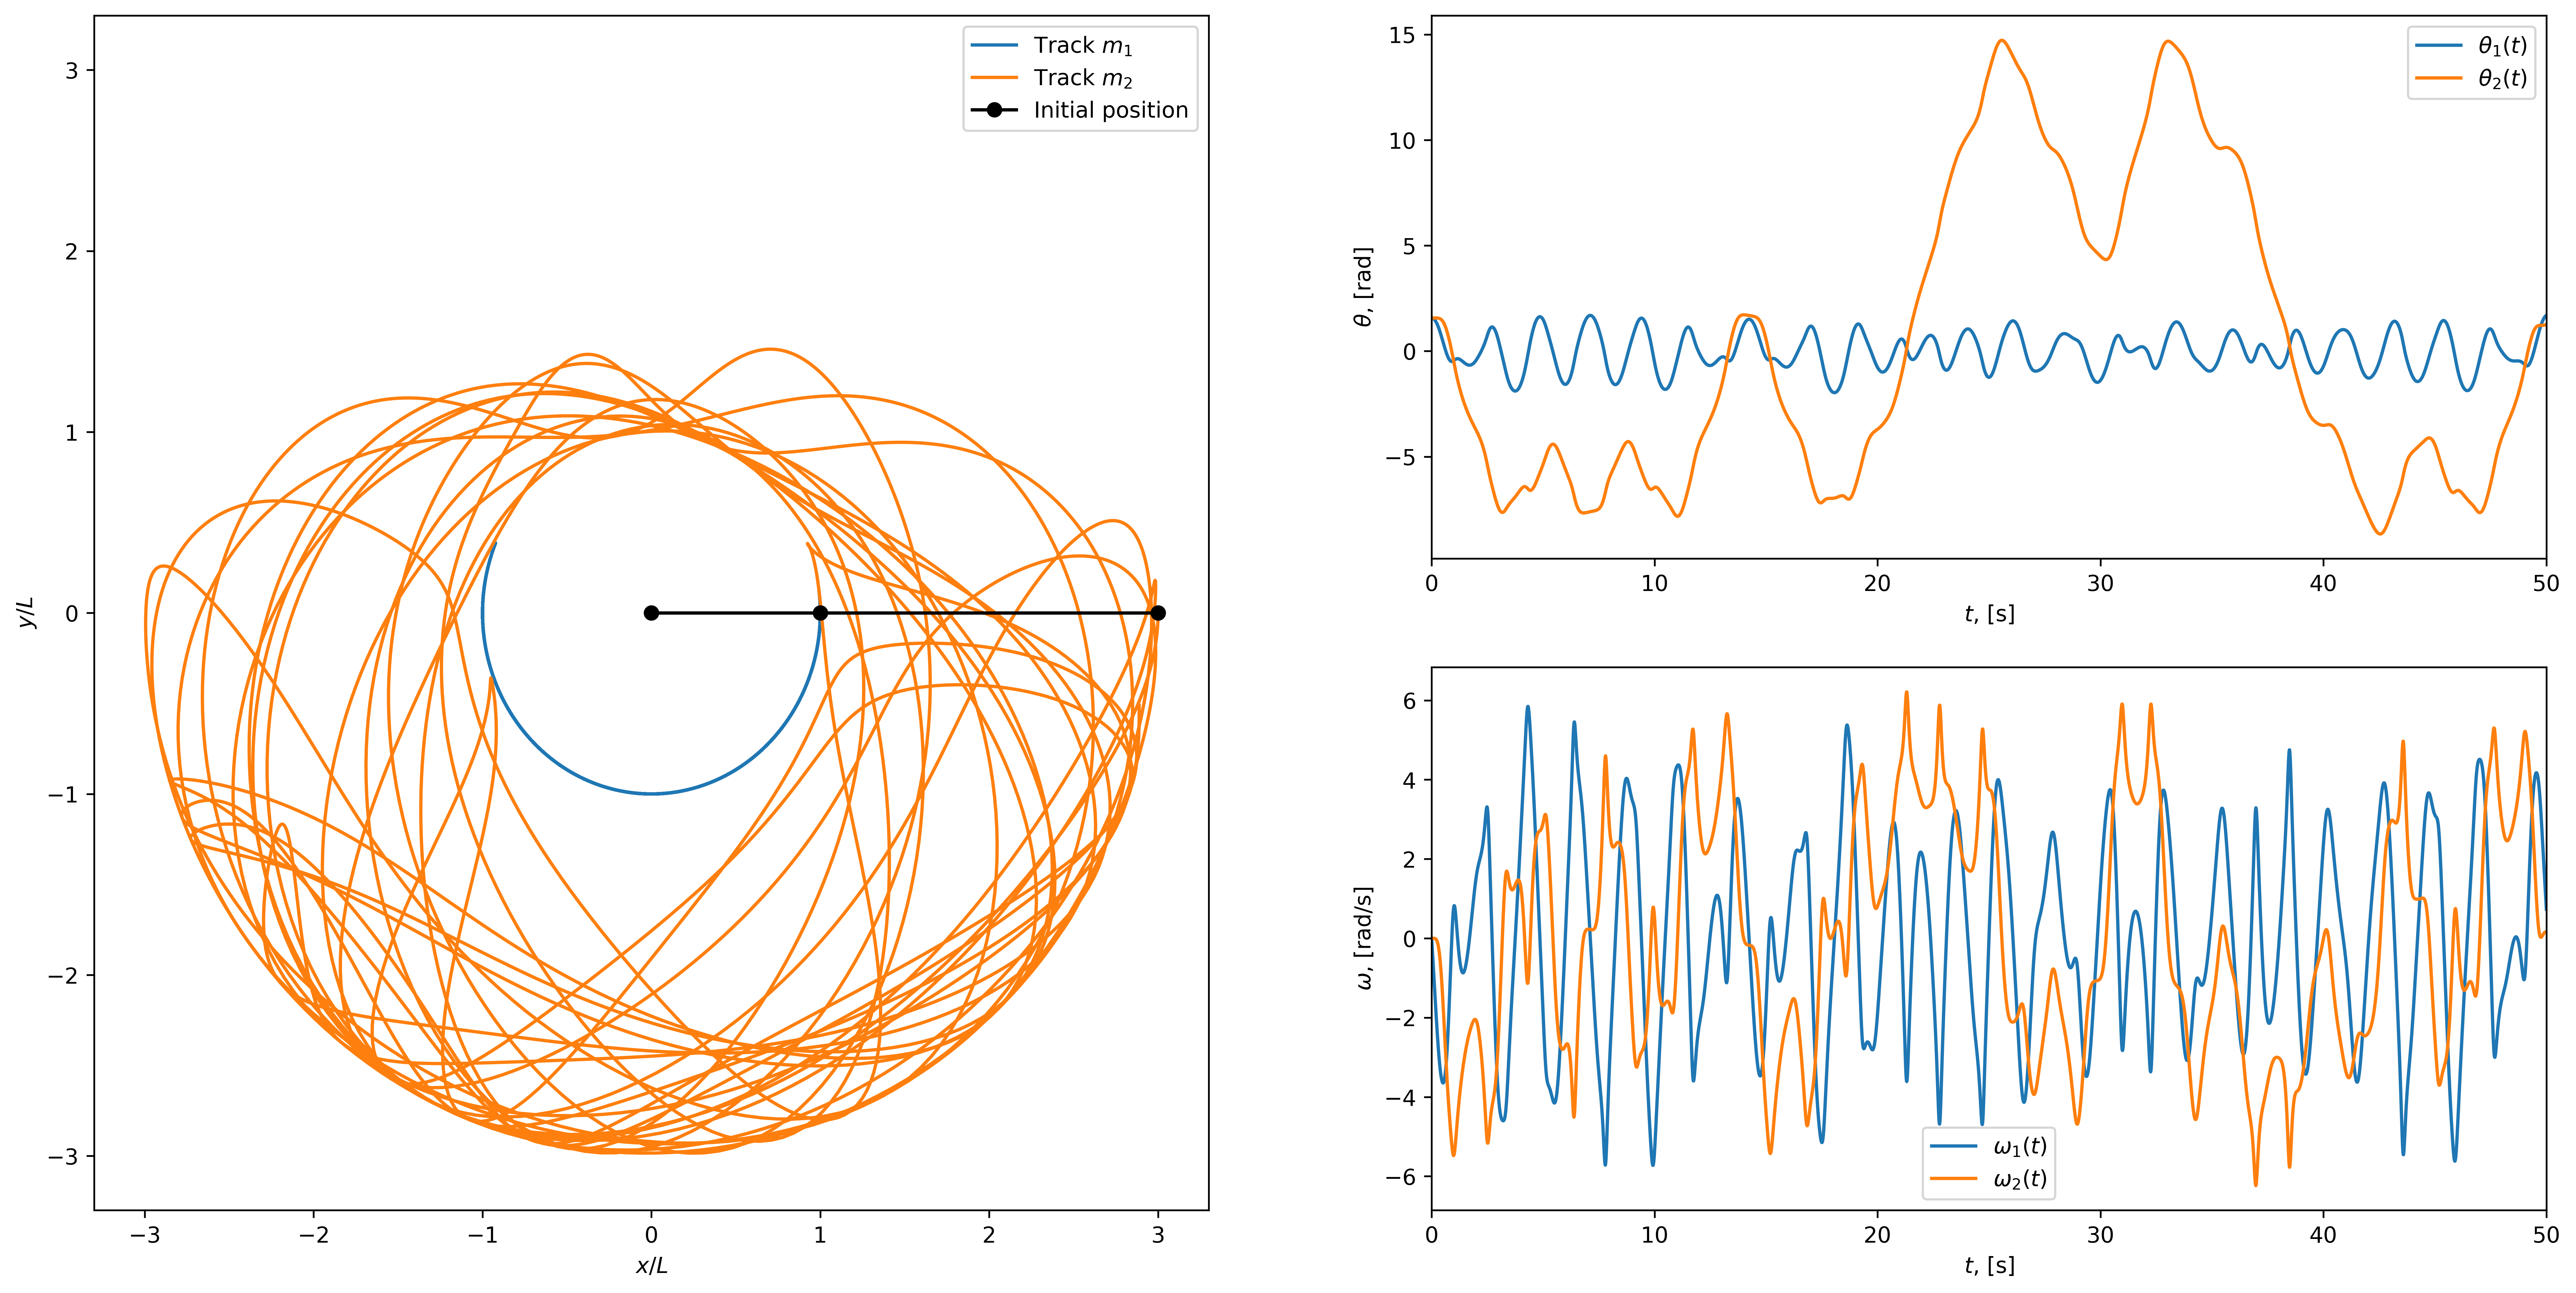

In [89]:
plot_position(x1, y1, x2, y2, theta1, theta2, t)

Como se puede ver, el resultado es bastante caótico y difícil de interpretar. A menudo, estas funciones complicadas del tiempo parecen más simples en los llamados *diagramas de espacio de fase*. 

### Diagramas de espacio de fase para el péndulo simple

Antes de analizar los diagramas de espacio de fase para el péndulo doble, se quiere discutir los diagramas de espacio de fase para un sistema más simple y ordenado. Como ejemplo, consideraremos el péndulo simple.

La ecuación de movimiento del péndulo simple está decrita por la siguiente ecuación:
 
\begin{equation}
\ddot \theta =\frac{\mathrm{d}^2\theta}{\mathrm{d} t^2} = -\frac{g}{L}\sin\theta.
\end{equation}

In [90]:
def RHS_simple(z, t, L, g):
    theta, w = z
    wdot = -sin(theta)*g/L
    return w, wdot

Una solución común a una ecuación de movimiento es una "posición" $          x (t) $ y una "velocidad" $ v (t) $. Para el péndulo simple, esto corresponde a $ \theta (t) $ y $ \omega (t) $. La gráfica $ (\theta (t), \omega (t)) $ se conoce como una gráfica de *espacio de fase*. Se crea la gráfica de espacio de fase para el péndulo simple para varias condiciones iniciales. Para simplificar, se deja que $ \theta_0 = 0 $ y $ \omega_0 $ varíen. 

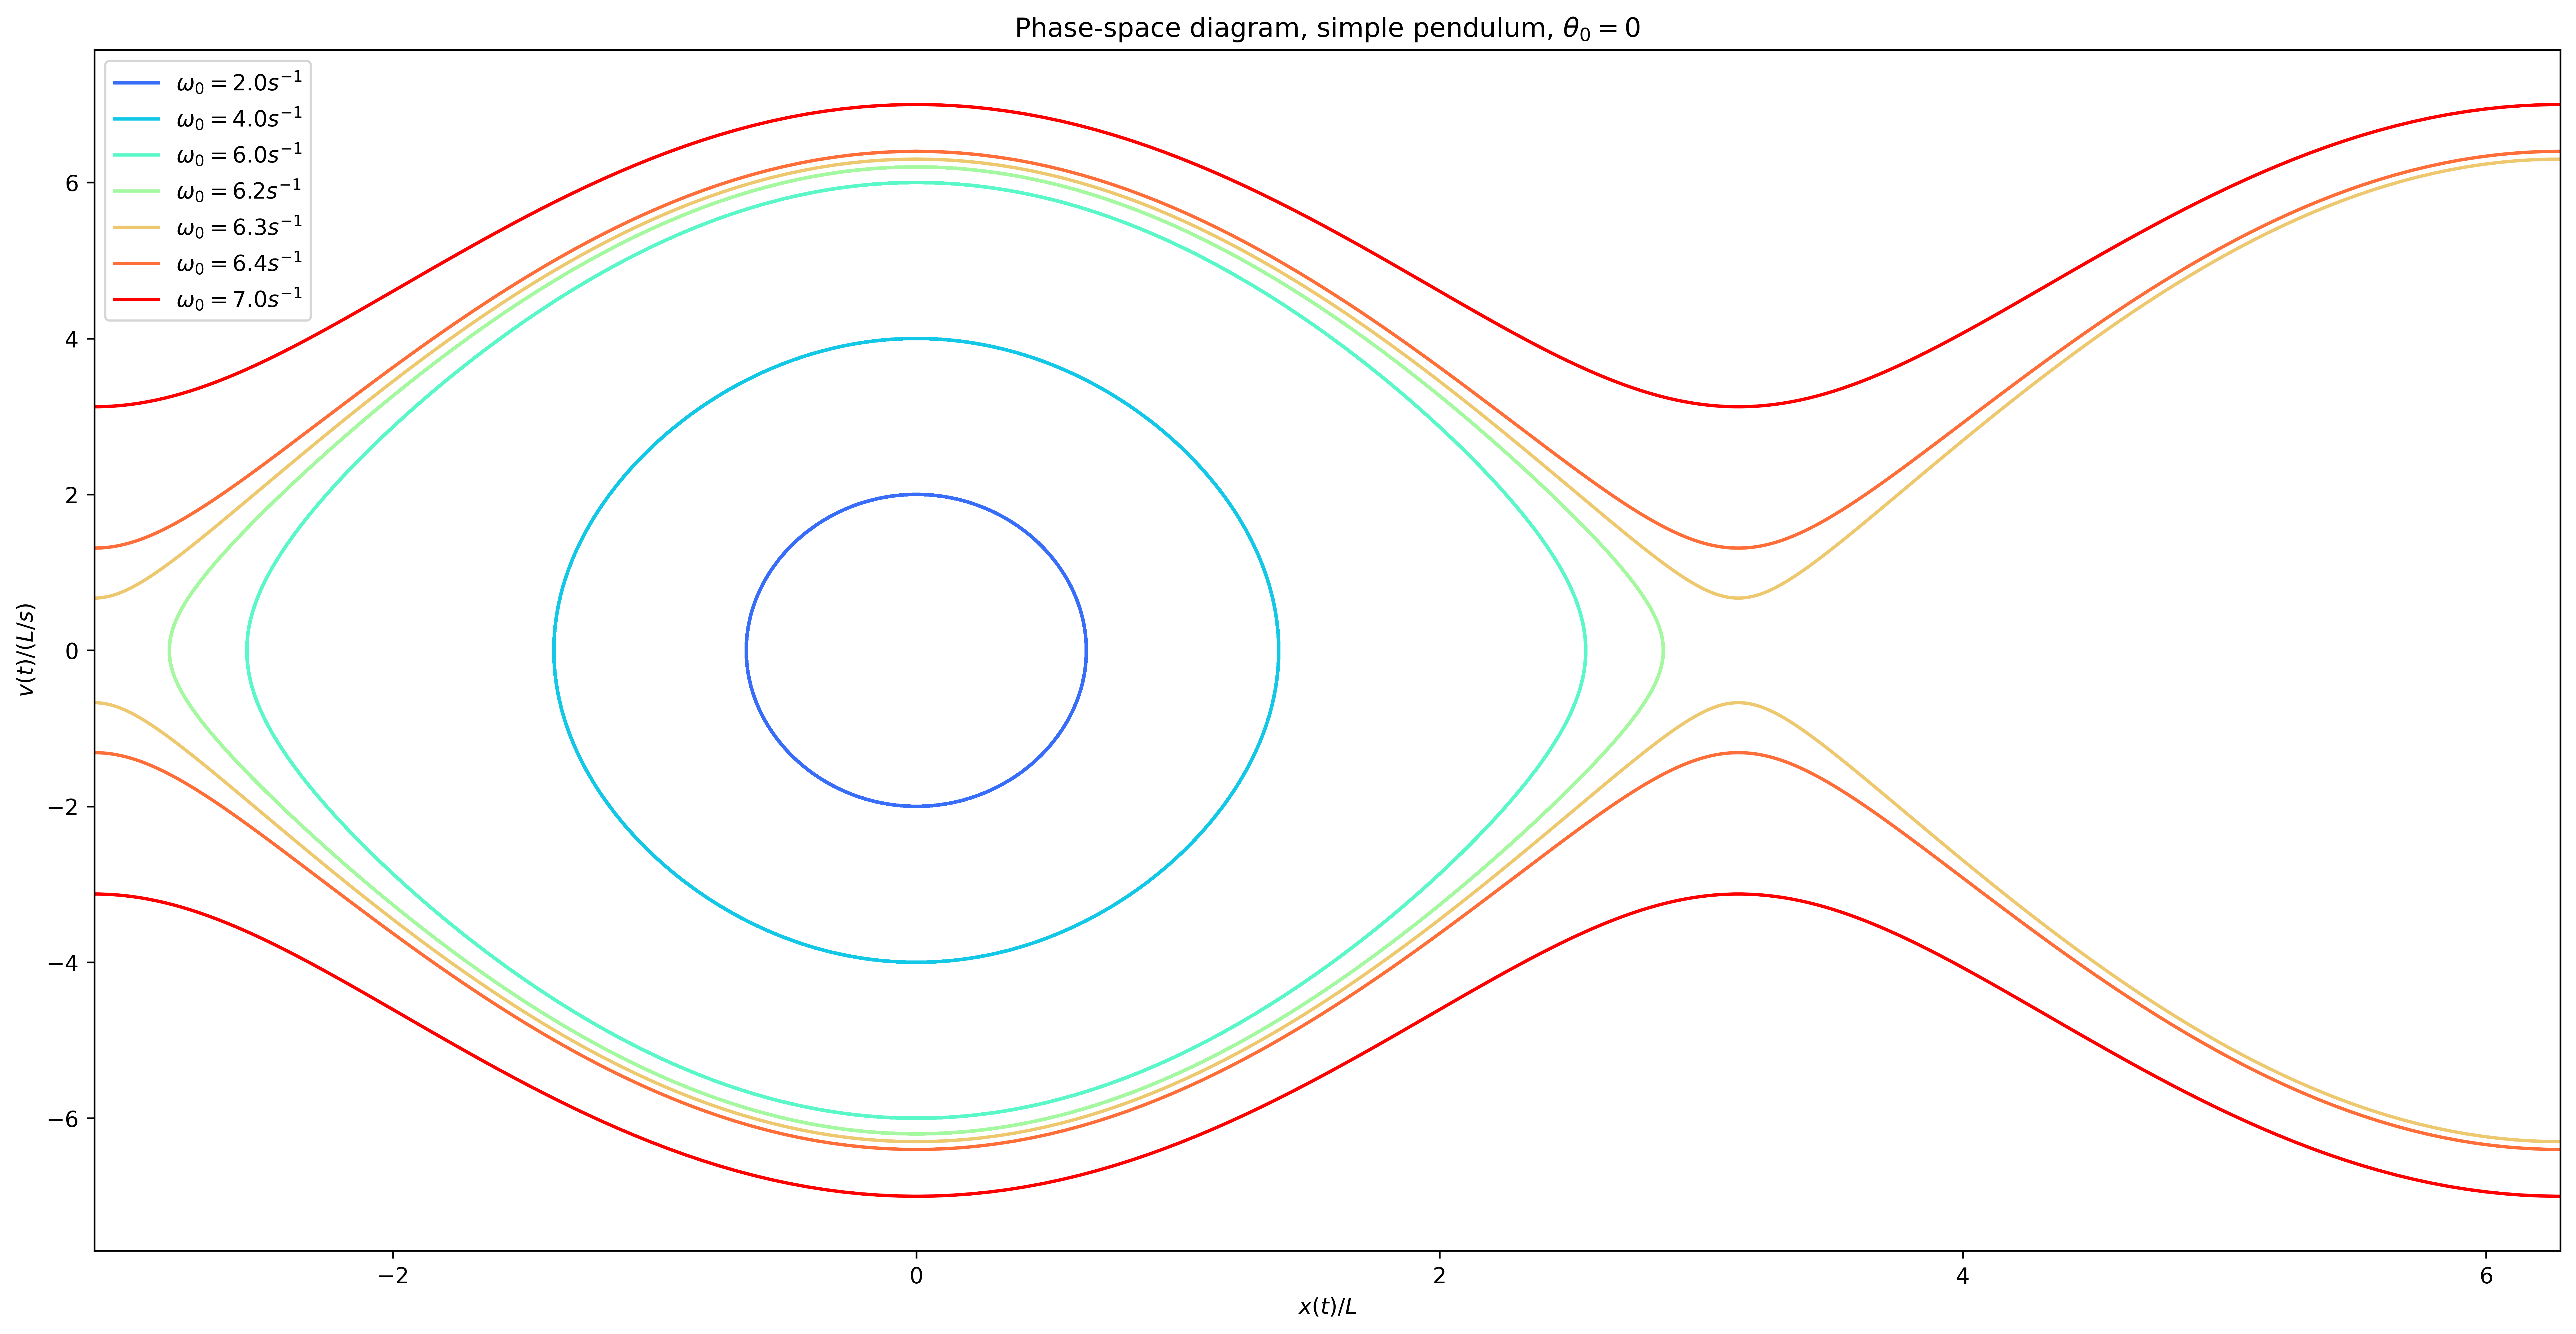

In [91]:
w0 = [2., 4., 6, 6.2, 6.3, 6.4, 7.]
L = 1.
g = 9.81
tmax_simp, dt_simp = 4, 0.01
t_simp = arange(0, tmax+dt, dt)

plt.figure(figsize=(2*figsize, figsize), dpi=dpi)
plt.title(r"Phase-space diagram, simple pendulum, $\theta_0=0$")
for i in range(len(w0)):
    z = odeint(RHS_simple, [0, w0[i]], t_simp, args=(L, g))
    theta_simp, w_simp = z[:,0], z[:,1]
    color = cm.rainbow(float(i + 1)/len(w0)) # Creating colormap
    plt.plot(theta_simp, w_simp, c=color, label=r"$\omega_0=%.1fs^{-1}$"%(w0[i]))
    plt.plot(theta_simp, -w_simp, c=color)
    plt.plot(-theta_simp, w_simp, c=color)
    plt.plot(-theta_simp, -w_simp, c=color)
plt.xlabel(r"$x(t)/L$")
plt.ylabel(r"$v(t)/(L/s)$")
plt.xlim([-pi, 2*pi])
plt.legend()
plt.show()

Aunque no se muestra completamente, el diagrama de espacio de fase es periódico con período $ 2 \pi $. Tenga en cuenta lo siguiente sobre el diagrama de espacio de fase para el péndulo simple:

- Para un potencial armónico, los diagramas de espacio de fase se convierten en elipses. Para $ \theta_ \text{max} $ pequeños, y por lo tanto $ \omega_0 $ pequeños, el potencial del péndulo simple es aproximadamente armónico y los diagramas de espacio de fase son elipses para $ \ omega_0 $ pequeños.
- Para aumentar $ \omega_0 $, las órbitas se vuelven más anarmónicas y obtienen esquinas angulares cada vez más diferenciadas en $ \theta (t) = \pm \pi $.
- Las órbitas cerradas corresponden a oscilaciones periódicas, mientras que las órbitas abiertas corresponden a movimientos no periódicos (o "en marcha").
- Si tuviéramos que incluir la fricción, como en el caso del péndulo amortiguado, la órbita del espacio de fase formará una espiral en un punto fijo.
- No se cruzan diferentes órbitas, ya que la solución para diferentes condiciones iniciales es única.


### Diagramas de espacio de fase para el péndulo doble

El movimiento del péndulo doble es mucho más complejo que el del péndulo simple. Por conveniencia, solo consideraremos el movimiento de la masa $ m_2 $. Tracemos el diagrama de espacio de fase para el péndulo doble discutido anteriormente. Con este fin, usaremos la función `plot_phasespace()`.

In [92]:
def plot_phasespace(theta1, w1, theta2, w2):
    
    plt.figure(figsize=(2*figsize, figsize), dpi=dpi)
    plt.title(r"Phase-space diagram, $\theta_{10}=%.1f$, $\theta_{20}=%.1f$ "%(theta1[0], theta2[0])
             + r"$\omega_{10}=%.1f$, $\omega_{20}=%.1f$"%(w1[0], w2[0]))
    plt.plot(theta1, w1, label=r"$i=1$")
    plt.plot(theta2, w2, label=r"$i=2$")
    plt.legend()
    plt.xlabel(r"$\theta_i$, [rad]")
    plt.ylabel(r"$\omega_i$, [rad/s]")
    xlim = [np.min(theta1), np.max(theta1), np.min(theta2), np.max(theta2)]
    plt.xlim(np.min(xlim), np.max(xlim))
    plt.show()

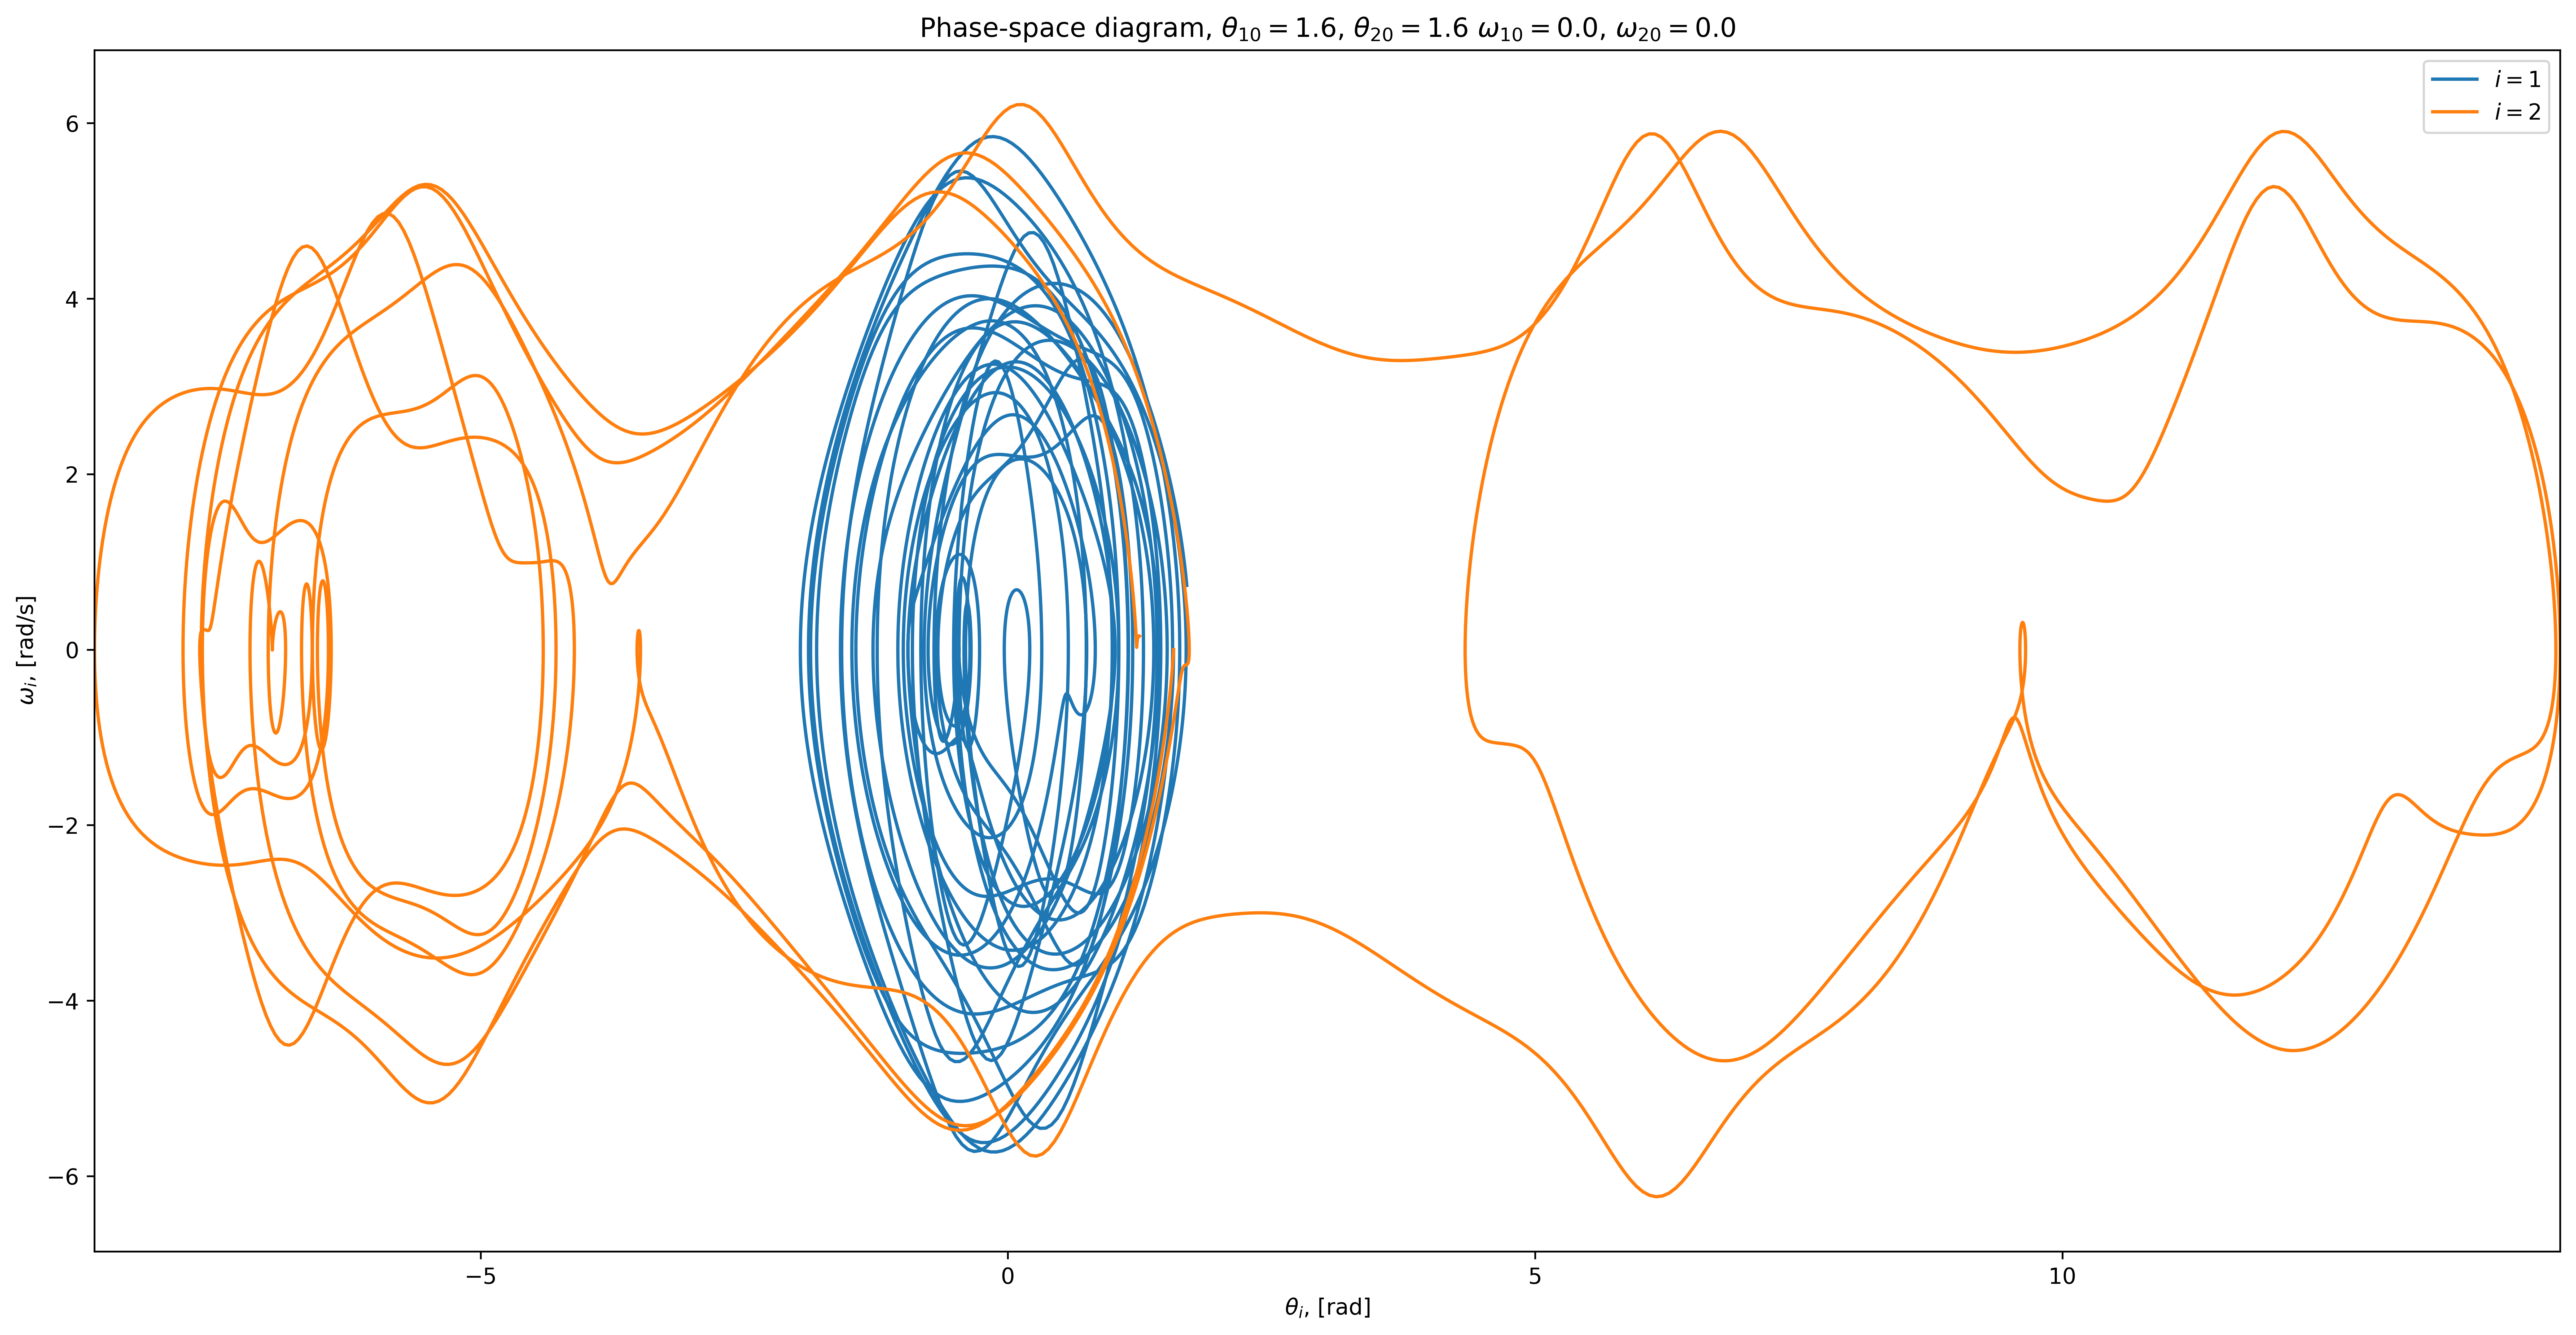

In [93]:
plot_phasespace(theta1, w1, theta2, w2)

Una vez más, el movimiento del péndulo doble es claramente más complejo que el del péndulo simple. Sin embargo, se pueden reconocer algunas de las características de la estructura del diagrama de espacio de fase para el péndulo simple. Esto se ve más fácilmente en la órbita del espacio-fase por $ m_1 $. Aquí, podemos ver claramente que hay varias estructuras periódicas "como elípticas". Las trayectorias no permanecen en una sola estructura, sino que en cierto sentido se sienten atraídas por ellas. La "aleatoriedad" conduce a estructuras que consisten en bandas difusas, en lugar de las líneas simples obtenidas en el caso del péndulo simple. Esto es lo que caracteriza al *movimiento caótico*. Esta es también la razón por la que el movimiento del sistema es hipersensible al cambio en las condiciones iniciales.

Tenga en cuenta que el movimiento de la masa $ m_2 $ tiene una tendencia mayor a rotar que $ m_1 $. En otras palabras, $ \theta_1 $ aumenta más rápido que $ \theta_2 $ en función del tiempo. En este sentido, el movimiento de la masa $ m_1 $ es más "aleatorio".

## 5. Resumen

*   Aunque el movimiento del sistema es caótico, están claras las estructuras del espacio de fase. Esto significa que hay un orden subyacente en el caos.

* Landau, R. H., Páez, M. J. and Bordeianu, C. C.: Computational Physics, 2nd edition, WILEY-VCH 2007.

* Richard L. Burden, 'Analisis Numerico', 10ma Edición

* EDO II: Runge-Kutta, método del disparo, Sistemas de EDOS